In [ ]:
import sklearn
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Data_AI_k20"

/content/drive/.shortcut-targets-by-id/1nMZkJtIkGK4puvqF_kUXAhOn-ehS3fpf/Data_AI_k20


In [ ]:
ls

Ai/    Han/    LamVu/   phi/   Tan/   Thoai/
Dang/  Hoang/  Nguyen/  Phuc/  Tanh/  Thuong/


In [ ]:
# preprocessing
link = "/content/drive/MyDrive/Data_AI_k20/"
face_names = os.listdir(link)
face_path = []
for face_name in face_names:
  face_path.append(os.path.join(link, face_name))
print(face_names)
X = []
y = []
for i in range(len(face_path)):
  print(face_names[i])
  img_path = list(Path(face_path[i]).glob("*"))
  for j in img_path:
    img = plt.imread(j)
    img = cv2.resize(img, (128, 128))
    img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['Ai', 'Tan', 'Thoai', 'Thuong', 'Phuc', 'Tanh', 'Hoang', 'phi', 'LamVu', 'Han', 'Nguyen', 'Dang']
Ai
Tan
Thoai
Thuong
Phuc
Tanh
Hoang
phi
LamVu
Han
Nguyen
Dang


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(1157, 128, 128, 3)
(1157,)


In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(1157, 12)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(y_test.shape)

(232, 12)


In [ ]:
from keras import models, layers
from keras.layers import Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential,Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(128,128,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(12,activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)     

In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=128, verbose=2)

Epoch 1/200
8/8 - 8s - loss: 3.5046 - accuracy: 0.2378 - 8s/epoch - 1s/step
Epoch 2/200
8/8 - 0s - loss: 1.2789 - accuracy: 0.5903 - 482ms/epoch - 60ms/step
Epoch 3/200
8/8 - 0s - loss: 0.1450 - accuracy: 0.9600 - 480ms/epoch - 60ms/step
Epoch 4/200
8/8 - 0s - loss: 0.2562 - accuracy: 0.9351 - 479ms/epoch - 60ms/step
Epoch 5/200
8/8 - 0s - loss: 0.0146 - accuracy: 0.9978 - 484ms/epoch - 61ms/step
Epoch 6/200
8/8 - 0s - loss: 0.0039 - accuracy: 1.0000 - 483ms/epoch - 60ms/step
Epoch 7/200
8/8 - 0s - loss: 0.0010 - accuracy: 1.0000 - 484ms/epoch - 61ms/step
Epoch 8/200
8/8 - 0s - loss: 4.7264e-04 - accuracy: 1.0000 - 481ms/epoch - 60ms/step
Epoch 9/200
8/8 - 0s - loss: 2.4178e-04 - accuracy: 1.0000 - 482ms/epoch - 60ms/step
Epoch 10/200
8/8 - 0s - loss: 1.1156e-04 - accuracy: 1.0000 - 481ms/epoch - 60ms/step
Epoch 11/200
8/8 - 0s - loss: 6.1491e-05 - accuracy: 1.0000 - 482ms/epoch - 60ms/step
Epoch 12/200
8/8 - 0s - loss: 4.0675e-05 - accuracy: 1.0000 - 484ms/epoch - 60ms/step
Epoch 13/2

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 22ms/step - loss: 4.9823e-05 - accuracy: 1.0000


[4.9822810979094356e-05, 1.0]

In [ ]:
file = "/content/drive/MyDrive/Data/Face_classification_weight.sav"

In [ ]:
import pickle
pickle.dump(model, open(file, 'wb'))

In [ ]:
loaded_model = pickle.load(open(file, 'rb'))

In [ ]:
X_test[0].shape

11/232
1/1 [==============================] - 0s 20ms/step
Predict: phi  (100%)
True_label:  phi


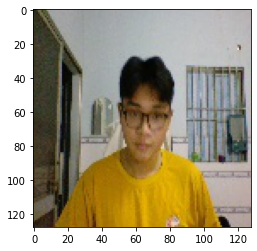

In [ ]:
# n = 1

n += 1
print(f'{n}/{len(y_test)}')
plt.imshow(X_test[n])
pred = loaded_model.predict(X_test[n].reshape((1, 128, 128, 3)))
print(f'Predict: {face_names[pred.argmax()]}  ({int(pred[0][pred.argmax()]*100)}%)')
print('True_label: ', face_names[y_test[n].argmax()])